# Requirements

In [2]:
# Add as many imports as you need.
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Laboratory Exercise - Run Mode (8 points)

## The Gym Dataset
The dataset contains detailed information on 973 gym members' workout sessions, including their exercise routines, physical attributes, and fitness metrics. The features include age, gender, weight, height, heart rate data (maxiumum BPM, average BPM, and resting BPM), session duration, calories burned, workout type, body fat percentage, water intake, workout frequency, and experience level. Each feature provides insights into different aspects of a gym member's workout habits, physical health, and overall fitness progression. These attributes, except for the 'burned calories', can be used as input variables for analysis and modeling. The 'burned calories' attribute serves as the target variable, representing the total calories burned during each workout session. This dataset offers a comprehensive set of features, making it ideal for exploring and understanding the factors that influence calorie burn during workouts.

Load the dataset into a `pandas` data frame.

In [6]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('Datasets/gym_members_exercise_tracking.csv')
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [8]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


Preprocess the input and the output variables appropriately.

In [10]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import LabelEncoder, StandardScaler
enc_gender = LabelEncoder()
enc_workout = LabelEncoder()
data['Gender'] = enc_gender.fit_transform(data['Gender'])
data['Workout_Type'] = enc_workout.fit_transform(data['Workout_Type'])

Explore the dataset using visualizations of your choice.

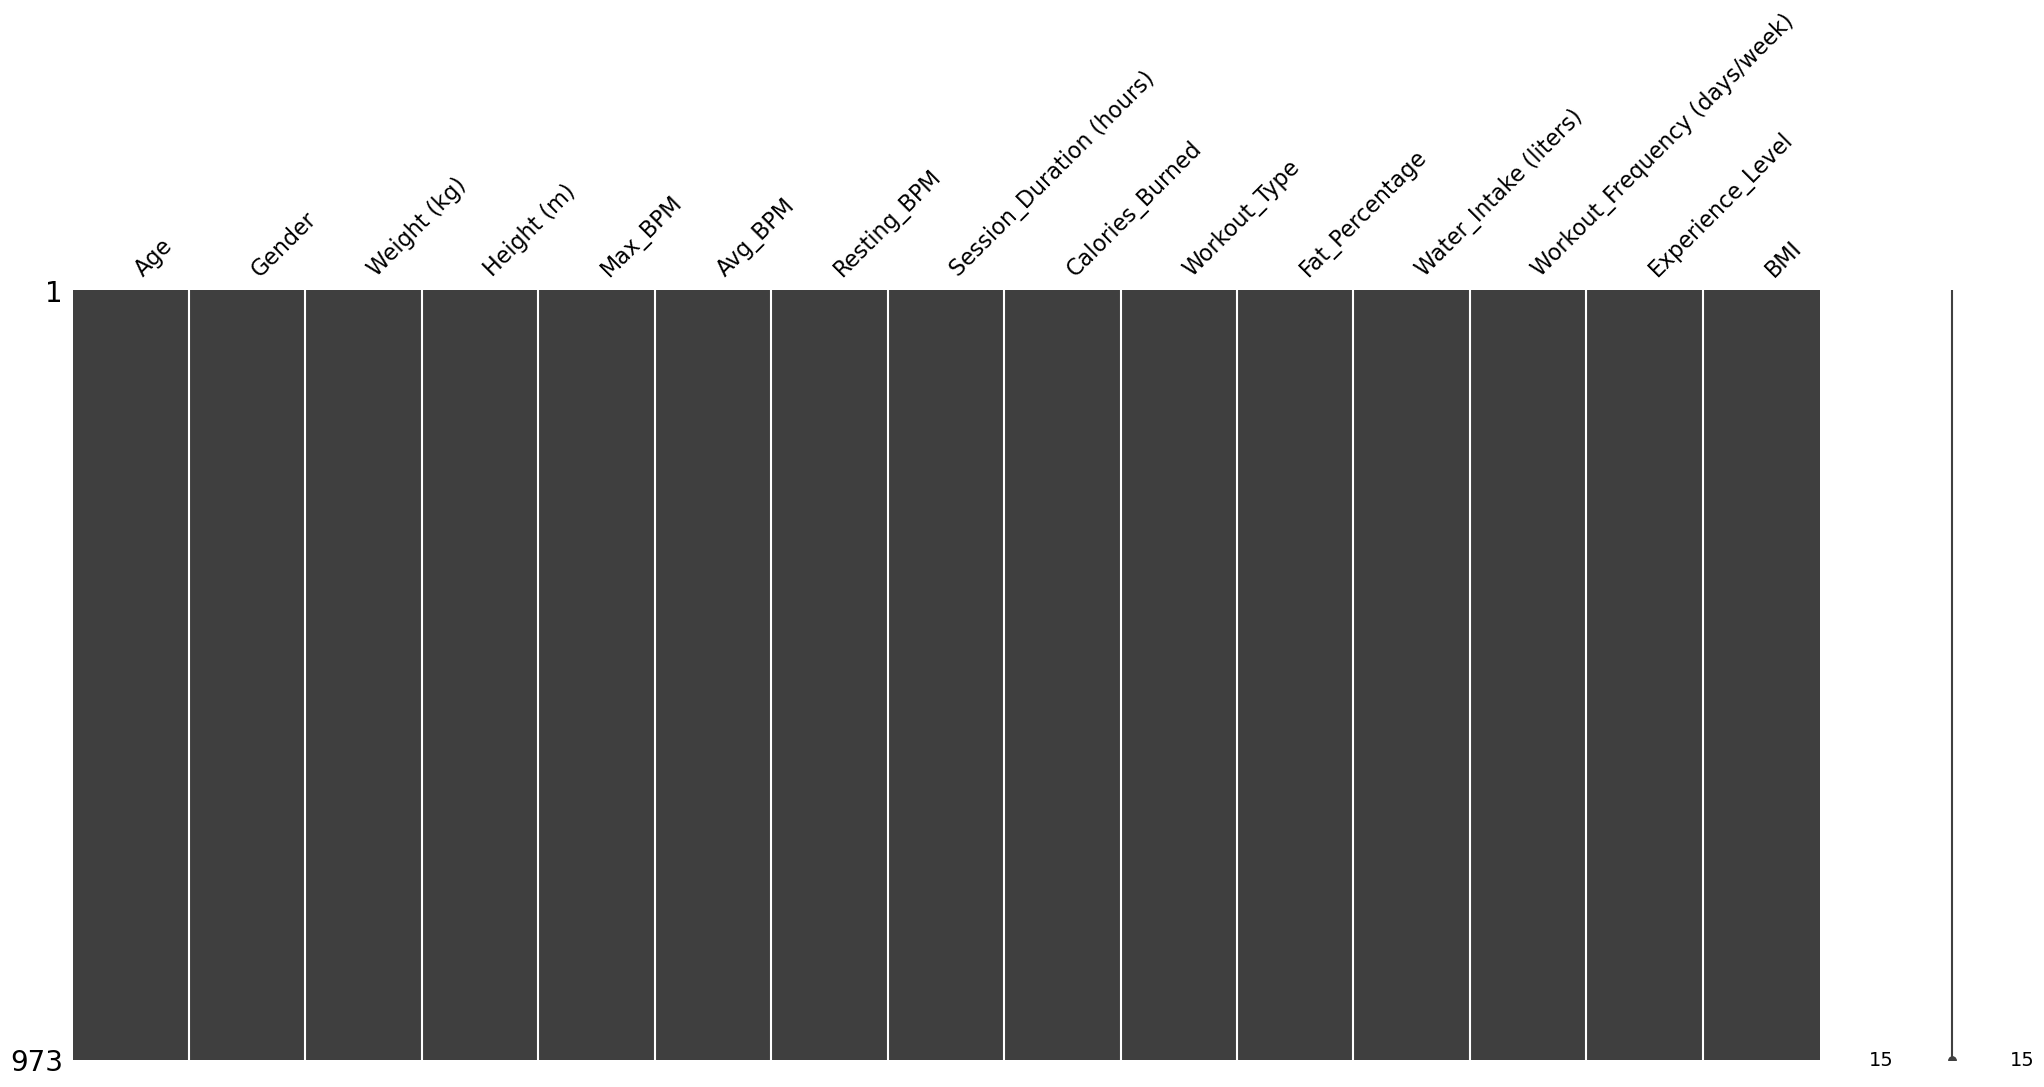

In [12]:
# Write your code here. Add as many boxes as you need.
msno.matrix(data)
plt.show()

Check if the dataset is balanced.

In [14]:
# Write your code here. Add as many boxes as you need.
value_counts = data['Calories_Burned'].value_counts(normalize=True)
value_counts

Calories_Burned
1025.0    0.006166
883.0     0.006166
875.0     0.005139
832.0     0.005139
711.0     0.004111
            ...   
1029.0    0.001028
1187.0    0.001028
482.0     0.001028
1096.0    0.001028
542.0     0.001028
Name: proportion, Length: 621, dtype: float64

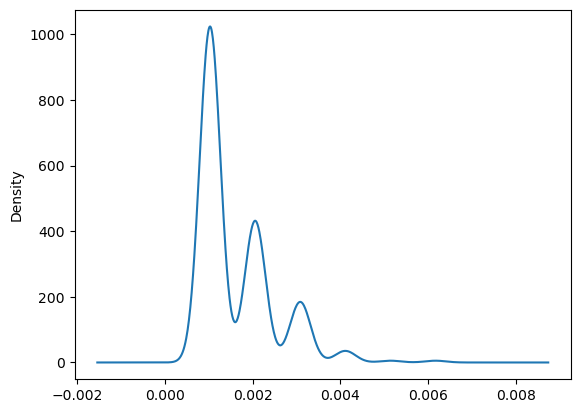

In [15]:
value_counts.plot(kind='density')
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [17]:
# Write your code here. Add as many boxes as you need.
missing_percentage = data.isnull().mean()*100
missing_percentage

Age                              0.0
Gender                           0.0
Weight (kg)                      0.0
Height (m)                       0.0
Max_BPM                          0.0
Avg_BPM                          0.0
Resting_BPM                      0.0
Session_Duration (hours)         0.0
Calories_Burned                  0.0
Workout_Type                     0.0
Fat_Percentage                   0.0
Water_Intake (liters)            0.0
Workout_Frequency (days/week)    0.0
Experience_Level                 0.0
BMI                              0.0
dtype: float64

In [18]:
data.isin(['', 'NA', 'N/A']).sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

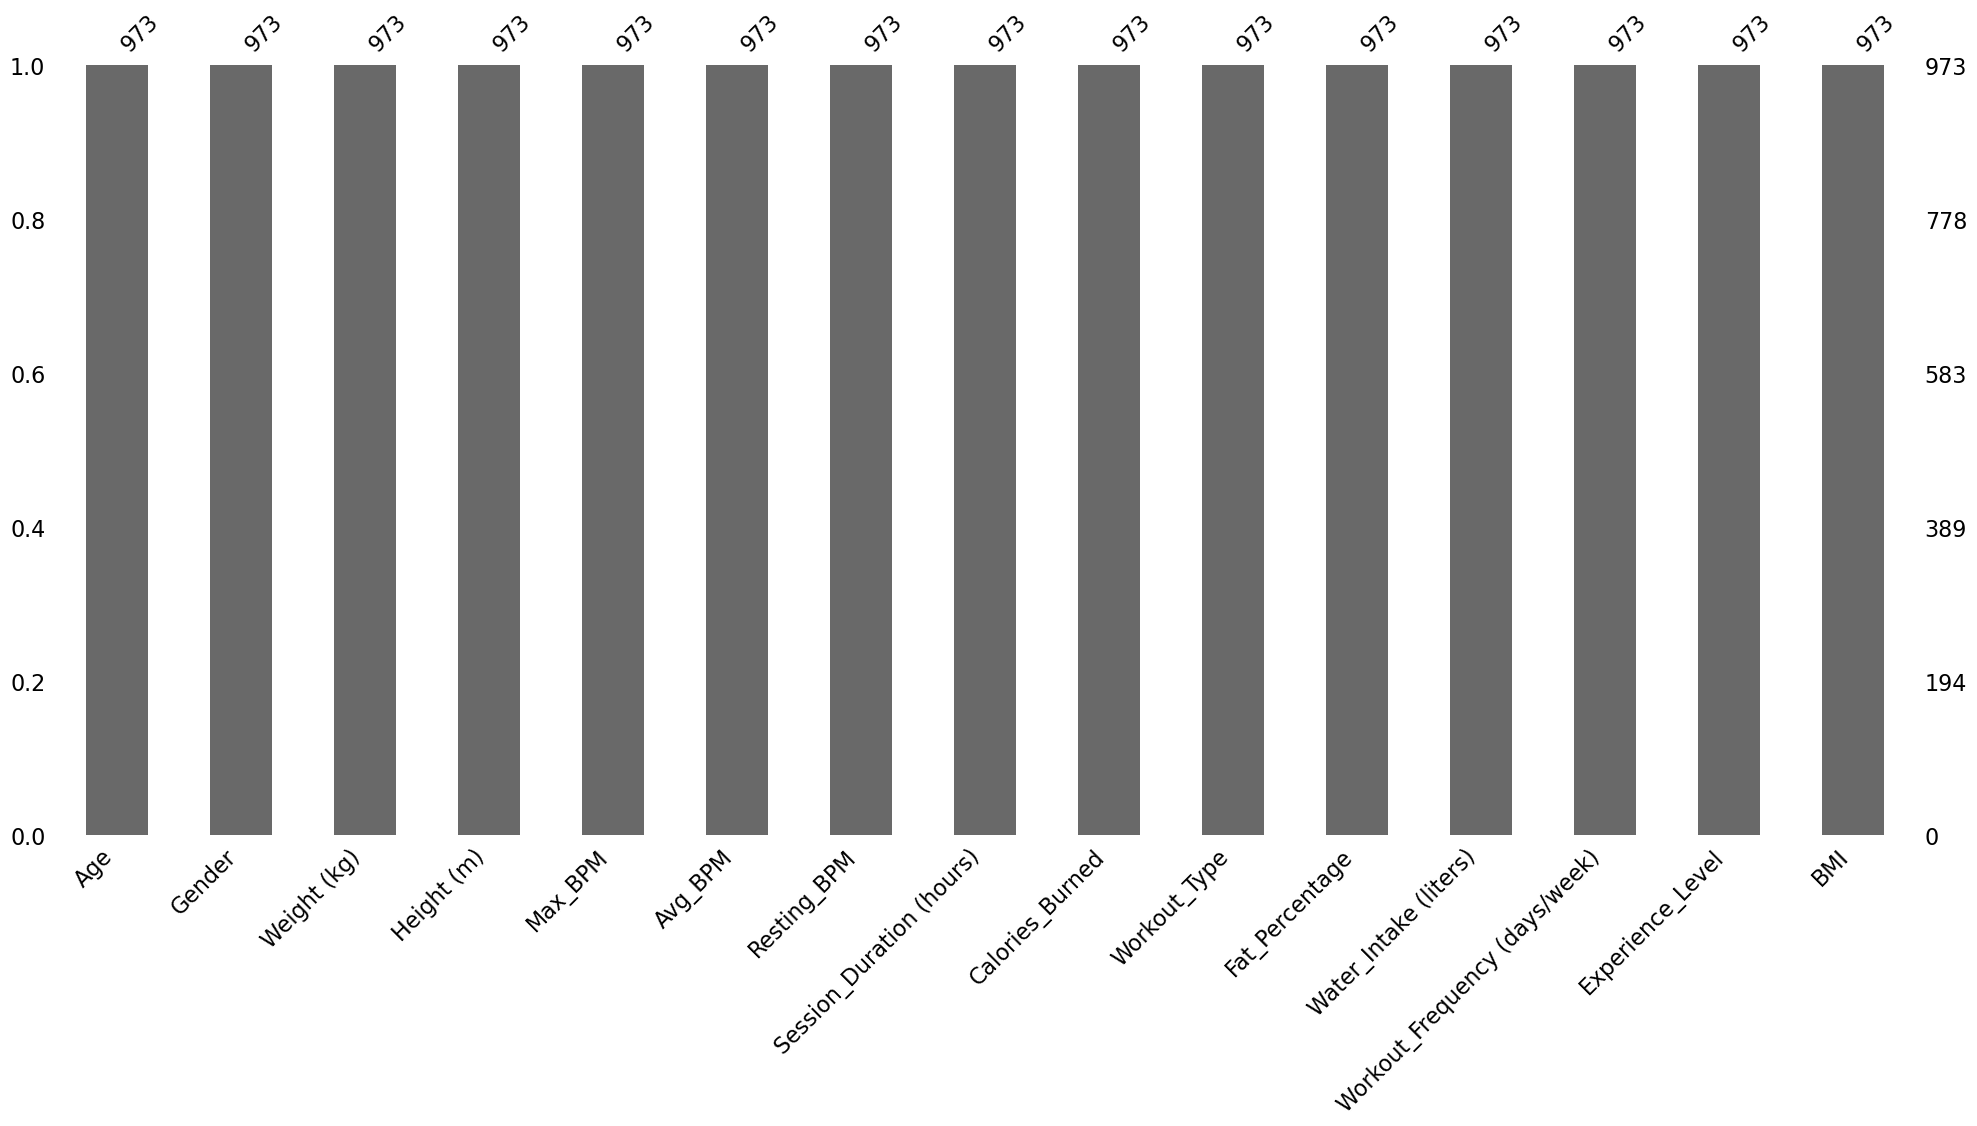

In [20]:
# Write your code here. Add as many boxes as you need.
msno.bar(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [22]:
# Write your code here. Add as many boxes as you need.
# NO MISSING VALUES idkkkkkkk??
import numpy as np

columns_to_check = ['Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM']
data[columns_to_check] = data[columns_to_check].replace(0, np.nan)

In [23]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [25]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
X = data.drop('Calories_Burned',axis = 1)
y = data['Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [27]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [30]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_scaled_train,y_train)

RandomForestRegressor()

Use the trained model to make predictions for the test set.

In [32]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_scaled_test)

Assess the performance of the model by using different classification metrics.

In [34]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
#for classification
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
#print("Accuracy:",accuracy_score(y_test, y_pred))

34.46661538461539
2052.70496974359
0.9739519917078758


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [38]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [40]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [42]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV
param_grid ={
    'max_depth': [3,5],
    'n_estimators': [100,200],
    
}
grid_search = GridSearchCV(RandomForestRegressor(),param_grid, cv=5,scoring='r2')
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 200]},
             scoring='r2')

In [43]:
print('Best Hyperparameters:', grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 100}


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [45]:
# Write your code here. Add as many boxes as you need.
y_pred = best_model.predict(X_scaled_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

45.398877564481275
3218.569859861758
0.9504071298145003
